In [2]:
%matplotlib inline

import numpy as np
import matplotlib.image as mpi
import matplotlib.pyplot as plt
import numpy.linalg as LA
import pandas as pd

In [13]:
data = pd.DataFrame(np.random.rand(30).reshape((10,3)), columns = ['one','two','three'])
data

,one,two,three
0,0.398762,0.467972,0.246388
1,0.716311,0.476600,0.784599
2,0.120520,0.707526,0.929509
3,0.399675,0.242747,0.212361
4,0.330401,0.839806,0.150290
5,0.658231,0.096590,0.449552
6,0.862544,0.315401,0.003442
7,0.851647,0.406787,0.405547
8,0.324296,0.712090,0.297499
9,0.871196,0.948532,0.866923


In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca.fit(data)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.50656063 0.31507627]
[1.06980257 0.843715  ]


In [17]:
print(sum(pca.explained_variance_ratio_))

0.821636894519235


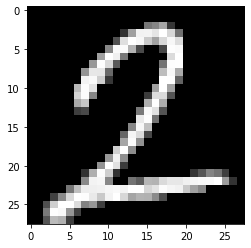

In [2]:
im = mpi.imread('two1.jpg')

def rgb2gray(rgb):
    """ Convert an rgb image to grayscale. 
    
        The rgb image must be in a NumPy ndarray.
    """
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])
  
im = rgb2gray(im)
im = -(im - 255)

mask = 1*np.array(im > 50)
im = mask*im

plt.imshow(im, cmap = 'gray');

In [9]:
E = LA.eig(im)
ell1 = np.max(np.abs(E[0]))

In [10]:
ell1

889.6807415756364

In [11]:
D = E[1][0]

In [12]:
im1 = D*im

In [1]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(im)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

NameError: name 'im' is not defined

In [19]:
help(PCA)

Help on class PCA in module sklearn.decomposition._pca:

class PCA(sklearn.decomposition._base._BasePCA)
 |  PCA(n_components=None, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)
 |  
 |  Principal component analysis (PCA).
 |  
 |  Linear dimensionality reduction using Singular Value Decomposition of the
 |  data to project it to a lower dimensional space. The input data is centered
 |  but not scaled for each feature before applying the SVD.
 |  
 |  It uses the LAPACK implementation of the full SVD or a randomized truncated
 |  SVD by the method of Halko et al. 2009, depending on the shape of the input
 |  data and the number of components to extract.
 |  
 |  It can also use the scipy.sparse.linalg ARPACK implementation of the
 |  truncated SVD.
 |  
 |  Notice that this class does not support sparse input. See
 |  :class:`TruncatedSVD` for an alternative with sparse data.
 |  
 |  Read more in the :ref:`User Guide <PCA>`.
 |  
 |  Pa

In [21]:
im1 = pca.transform(im)

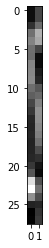

In [22]:
plt.imshow(im1, cmap = 'gray');